# Продажа квартир в Санкт-Петербурге — анализ рынка недвижимости

В нашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования**:

Установить параметры, влияющие на стоимость и продажи квартир в Санкт-Петербурге и соседних населенных пунктах.

**Ход исследования**:

Данные о поведении пользователей мы получим из файла `real_estate_data.csv`. О качестве данных ничего не известно. Поэтому понадобится обзор данных. 

Мы проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки мы поищем возможность исправить самые критичные ошибки данных.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучим-цену,-площадь,-число-комнат,-высоту-потолков" data-toc-modified-id="Изучим-цену,-площадь,-число-комнат,-высоту-потолков-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучим цену, площадь, число комнат, высоту потолков</a></span></li><li><span><a href="#Изучим-время-продажи-квартиры" data-toc-modified-id="Изучим-время-продажи-квартиры-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Изучим время продажи квартиры</a></span></li><li><span><a href="#Уберем-редкие-и-выбивающиеся-значения" data-toc-modified-id="Уберем-редкие-и-выбивающиеся-значения-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Уберем редкие и выбивающиеся значения</a></span></li><li><span><a href="#Изучим-от-чего-зависит-цена-квартиры" data-toc-modified-id="Изучим-от-чего-зависит-цена-квартиры-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Изучим от чего зависит цена квартиры</a></span></li><li><span><a href="#Изучим-10-населённых-пунктов-с-наибольшим-числом-объявлений" data-toc-modified-id="Изучим-10-населённых-пунктов-с-наибольшим-числом-объявлений-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Изучим 10 населённых пунктов с наибольшим числом объявлений</a></span></li><li><span><a href="#Изучим-квартиры-в-Санкт-Петербурге" data-toc-modified-id="Изучим-квартиры-в-Санкт-Петербурге-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Изучим квартиры в Санкт-Петербурге</a></span></li><li><span><a href="#Изучим-квартиры-в-центре-Санкт-Петербурга" data-toc-modified-id="Изучим-квартиры-в-центре-Санкт-Петербурга-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Изучим квартиры в центре Санкт-Петербурга</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Изучение данных из файла

Импортируем библиотеки:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Настроим вывод для вещественных чисел:

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

Прочитаем файл `real_estate_data.csv` из папки `datasets` и сохраним его в переменной `df`:

In [3]:
df = pd.read_csv('datasets/real_estate_data.csv', sep='\t')

Выведем на экран случайные 8 строк таблицы `df`:

In [4]:
df.sample(8).T

,21489,16185,7192,7378,6449,13925,7057,413
total_images,1,10,0,14,20,15,8,10
last_price,"10,379,600.00","6,900,000.00","7,680,000.00","14,500,000.00","2,650,000.00","9,390,000.00","5,200,000.00","4,250,000.00"
total_area,67.40,63.70,60.00,72.00,46.90,68.00,55.50,37.00
first_day_exposition,2018-03-15T00:00:00,2017-10-19T00:00:00,2019-04-17T00:00:00,2017-11-10T00:00:00,2018-03-26T00:00:00,2018-10-22T00:00:00,2017-07-05T00:00:00,2018-06-29T00:00:00
rooms,2,2,3,2,2,2,2,1
ceiling_height,NaN,2.70,NaN,NaN,2.50,3.00,3.00,2.70
floors_total,14.00,25.00,9.00,12.00,5.00,24.00,5.00,16.00
living_area,36.00,32.00,42.50,24.80,28.00,35.00,34.50,18.50
floor,12,2,8,4,4,10,5,2
is_apartment,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Получим общую информацию о таблице:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [6]:
df_len_begin = len(df)
print('Количество строк в исходном датафрейме:', df_len_begin)

Количество строк в исходном датафрейме: 23699


Итак, в таблице 22 столбца, 23699 строк. Тип данных в столбцах: `object`, `bool`, `float64`, `int64`.

Описание данных

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

Оставим в датафрейме только те столбцы, которое нам нужны для ответа на поставленные вопросы

In [7]:
columns = [
    'last_price',
    'first_day_exposition',
    'days_exposition',
    'rooms',
    'total_area',
    'living_area',
    'kitchen_area',
    'ceiling_height',
    'floor',
    'floors_total',
    'cityCenters_nearest',
    'locality_name',
    'studio', 
    'open_plan',
]
df = df[columns]

Посчитаем количество и процент пропущенных значений

In [8]:
isna_stat = pd.concat([df.isna().sum(), df.isna().mean().map('{:.2%}'.format)], axis=1)
isna_stat.columns = ['количество пропущенных значений', 'процент пропущенных значений']
display(isna_stat)

,количество пропущенных значений,процент пропущенных значений
last_price,0,0.00%
first_day_exposition,0,0.00%
days_exposition,3181,13.42%
rooms,0,0.00%
total_area,0,0.00%
living_area,1903,8.03%
kitchen_area,2278,9.61%
ceiling_height,9195,38.80%
floor,0,0.00%
floors_total,86,0.36%


Выведем на экран случайные 10 строк таблицы `df`:

In [9]:
df.sample(10).T

,14160,1447,2568,15252,3939,4013,9577,19858,6007,13416
last_price,"5,049,998.00","6,040,000.00","4,950,000.00","3,200,000.00","1,860,000.00","4,500,000.00","22,212,254.00","3,000,000.00","6,200,000.00","4,750,000.00"
first_day_exposition,2018-04-30T00:00:00,2017-12-22T00:00:00,2017-06-07T00:00:00,2018-02-12T00:00:00,2018-07-02T00:00:00,2019-03-18T00:00:00,2018-07-06T00:00:00,2016-02-04T00:00:00,2016-02-29T00:00:00,2017-05-12T00:00:00
days_exposition,138.00,NaN,56.00,261.00,279.00,4.00,NaN,137.00,184.00,332.00
rooms,1,3,2,1,2,1,3,1,1,2
total_area,35.50,59.40,55.20,49.50,51.80,37.40,143.00,31.00,41.20,51.00
living_area,15.60,36.30,32.60,21.30,29.00,18.50,NaN,18.00,17.10,30.30
kitchen_area,8.70,9.50,10.20,12.10,9.00,10.10,NaN,6.00,10.20,6.60
ceiling_height,3.00,2.80,NaN,NaN,NaN,2.70,NaN,NaN,NaN,NaN
floor,14,3,11,2,5,5,8,9,4,3
floors_total,16.00,6.00,12.00,5.00,5.00,24.00,12.00,9.00,13.00,5.00


Напишем функцию `investigate_column` для анализа данных в колонке

In [10]:
def investigate_column(column, is_category=False, is_bool=False):
    '''
    аргументы функции:
    column - имя колонки датафрейма
    is_category - True для категориального признака. По умолчанию False
    is_bool - True для булевого признака. По умолчанию False
    '''
    display(isna_stat.query('index == @column'))
    if not is_bool:
        print('')
        print('Метод describe:')
        print(df[column].describe())
    if is_category or is_bool:
        print('')
        print('Метод value_counts:')
        print(df[column].value_counts())

**Посмотрим на значения в колонке `last_price` — цена на момент снятия с публикации**

Вызовем функцию `investigate_column` и передадим ей название столбца `last_price` в качестве аргумента

In [11]:
investigate_column('last_price')

,количество пропущенных значений,процент пропущенных значений
last_price,0,0.00%



Метод describe:
count        23,699.00
mean      6,541,548.77
std      10,887,013.27
min          12,190.00
25%       3,400,000.00
50%       4,650,000.00
75%       6,800,000.00
max     763,000,000.00
Name: last_price, dtype: float64


Выведем первые и последние 8 строк таблицы с сортировкой по убыванию цены квартиры

In [12]:
(
    df
    .sort_values(by='last_price', ascending=False)
    .head(8)
    .T
)

,12971,19540,14706,1436,15651,22831,16461,13749
last_price,"763,000,000.00","420,000,000.00","401,300,000.00","330,000,000.00","300,000,000.00","289,238,400.00","245,000,000.00","240,000,000.00"
first_day_exposition,2017-09-30T00:00:00,2017-12-06T00:00:00,2016-02-20T00:00:00,2018-04-04T00:00:00,2017-12-18T00:00:00,2019-03-19T00:00:00,2017-04-10T00:00:00,2017-04-01T00:00:00
days_exposition,33.00,106.00,393.00,233.00,111.00,NaN,249.00,199.00
rooms,7,12,5,3,7,2,6,6
total_area,400.00,900.00,401.00,190.00,618.00,187.50,285.70,410.00
living_area,250.00,409.70,204.00,95.00,258.00,63.70,182.80,218.00
kitchen_area,NaN,112.00,24.00,40.00,70.00,30.20,29.80,40.00
ceiling_height,NaN,2.80,NaN,3.50,3.40,3.37,3.35,3.40
floor,10,25,9,5,5,6,4,7
floors_total,10.00,25.00,9.00,7.00,7.00,6.00,7.00,7.00


**Выводы по колонке `last_price`:**

Видим, что в колонке нет пропущенных значений. 

Медиана по колонке 4,65 млн, есть аномально высокие значения c максимальным значением в 763 млн. Это связано с тем, что в Санкт-Петербурге есть квартиры с большой площадью. Высокие значения выглядят правдоподобными.
Минимальное значение по колонке 12190 квартира в Санкт-Перербурге с площадью 109 м2 - аномалия, которую необходимо удалить

**Посмотрим на значения в колонке `first_day_exposition` — дата публикации**

In [13]:
investigate_column('first_day_exposition')

,количество пропущенных значений,процент пропущенных значений
first_day_exposition,0,0.00%



Метод describe:
count                   23699
unique                   1491
top       2018-02-01T00:00:00
freq                      368
Name: first_day_exposition, dtype: object


**Выводы по колонке `first_day_exposition`:**

Видим, что в колонке нет пропущенных значений. 

Тип данных в колонке - `object`. В предобработке данных изменим тип данных на `datetime` для того чтобы в дальнейшем получить из этих данных день недели, месяц и год публикации объявления

**Посмотрим на значения в колонке `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)**

In [14]:
investigate_column('days_exposition')

,количество пропущенных значений,процент пропущенных значений
days_exposition,3181,13.42%



Метод describe:
count   20,518.00
mean       180.89
std        219.73
min          1.00
25%         45.00
50%         95.00
75%        232.00
max      1,580.00
Name: days_exposition, dtype: float64


**Выводы по колонке `days_exposition`:**

Видим, что в колонке есть 13% пропущенных значений. Предположим, что это связано с тем, что объявления до сих пор находятся в продаже на момент формирования датасета или продавцы забыли отметить это объявление как завершенное. Пропуски заполнять не будем, так как нет подоходящих значений для их заполнения.

Медиана по колонке 95 дней. На предобработке данных избавимся от значений меньше 2 дней, будем считать что продавец передумал за это время продавать свою недвижимость и снял объявление без продажи квартиры. Так же избавимся от значений больше 730: будем считать, что продавец забыл указать о факте продажи квартиры

**Посмотрим на значения в колонке `studio` — квартира-студия (булев тип)**

In [15]:
# передадим в функцию аргумент is_bool=True, так как колонка имеет булевый тип
investigate_column('studio', is_bool=True)

,количество пропущенных значений,процент пропущенных значений
studio,0,0.00%



Метод value_counts:
False    23550
True       149
Name: studio, dtype: int64


In [16]:
print('Процент квартир-студий в данных: {:.2%}'.format(len(df.query('studio == 1')) / df_len_begin))

Процент квартир-студий в данных: 0.63%


In [17]:
print('Минимальная площадь студии c 0 комнатами:', df.query('studio == 1 and rooms == 0').total_area.min())

Минимальная площадь студии c 0 комнатами: 15.5


In [18]:
print('Максимальная площадь студии c 0 комнатами:', df.query('studio == 1 and rooms == 0').total_area.max())

Максимальная площадь студии c 0 комнатами: 98.4


Посмотрим распределение количества комнат в квартирах-студиях

In [19]:
df[df['studio'] == 1].groupby('rooms')['rooms'].count()

rooms
0    138
1     11
Name: rooms, dtype: int64

**Выводы по колонке `studio`:**

Видим, что в колонке нет пропущенных значений.
Количество записей с квартирами-студиями в нашем датафрейме меньше 1%

Так квартира-студия с 0 комнат - это помещение с разбросом площади от 15 до 98 квадратных метров, то в предобработке данных удалим все записи со студиями, чтобы эти записи не влияли на результаты нашего исследования

**Посмотрим на значения в колонке `open_plan` — свободная планировка (булев тип)**

In [20]:
# передадим в функцию аргумент is_bool=True, так как колонка имеет булевый тип
investigate_column('open_plan', is_bool=True)

,количество пропущенных значений,процент пропущенных значений
open_plan,0,0.00%



Метод value_counts:
False    23632
True        67
Name: open_plan, dtype: int64


Посмотрим распределение количества комнат в квартирах со свободной планировкой

In [21]:
df[df['open_plan'] == 1].groupby('rooms')['rooms'].count()

rooms
0    59
1     3
2     1
3     2
4     1
5     1
Name: rooms, dtype: int64

In [22]:
print('Процент квартир со свободной планировкой: {:.2%}'.format(len(df.query('open_plan == 1')) / df_len_begin))

Процент квартир со свободной планировкой: 0.28%


Минимальная площадь квартиры со свободной планировкой c 0 комнатами:

In [23]:
df.query('open_plan == 1 and rooms == 0').total_area.min()

16.0

Максимальная площадь квартиры со свободной планировкой c 0 комнатами:

In [24]:
df.query('open_plan == 1 and rooms == 0').total_area.max()

371.0

**Выводы по колонке `open_plan`:**

Видим, что в колонке нет пропущенных значений.
Количество записей с квартирами свободной планировки в нашем датафрейме меньше 0,3%

Так квартира со свободной планировкой c 0 комнатами - это помещение с разбросом площади от 16 до 371 квадратных метров, то в предобработке данных удалим все записи с квартирами со свободной планировкой, чтобы эти записи не влияли на результаты нашего исследования

**Посмотрим на значения в колонке `rooms` — число комнат**

In [25]:
# передадим в функцию аргумент is_category=True, так как переменная в колонке имеет категориальный тип
investigate_column('rooms', is_category=True)

,количество пропущенных значений,процент пропущенных значений
rooms,0,0.00%



Метод describe:
count   23,699.00
mean         2.07
std          1.08
min          0.00
25%          1.00
50%          2.00
75%          3.00
max         19.00
Name: rooms, dtype: float64

Метод value_counts:
1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64


Количество строк с 0 комнат:

In [26]:
len(df.query('rooms == 0 and (open_plan == 1 or studio == 1)'))

197

Выведем первые 8 объявлений с наибольшим количеством комнат

In [27]:
(
    df
    .sort_values(by='rooms', ascending=False)
    .head(8)
    .T
)

,14498,18848,5358,20829,866,19540,9688,648
last_price,"32,250,000.00","28,500,000.00","65,000,000.00","28,659,000.00","25,000,000.00","420,000,000.00","33,000,000.00","17,500,000.00"
first_day_exposition,2018-06-09T00:00:00,2015-03-02T00:00:00,2019-02-14T00:00:00,2016-03-31T00:00:00,2017-12-23T00:00:00,2017-12-06T00:00:00,2017-02-07T00:00:00,2018-07-01T00:00:00
days_exposition,114.00,"1,365.00",14.00,95.00,418.00,106.00,813.00,NaN
rooms,19,16,15,14,14,12,11,11
total_area,374.60,270.00,590.00,245.40,363.00,900.00,194.10,183.70
living_area,264.50,180.00,409.00,168.30,222.00,409.70,129.00,138.80
kitchen_area,27.60,13.00,100.00,25.90,16.60,112.00,11.90,13.30
ceiling_height,NaN,3.00,3.50,NaN,3.16,2.80,3.43,3.40
floor,2,4,3,2,4,25,2,7
floors_total,5.00,4.00,6.00,4.00,5.00,25.00,5.00,7.00


**Выводы по колонке `rooms`:**

Видим, что в колонке нет пропущенных значений.

Видим аномальное значение в 0 комнат - 197 квартир, и все эти квартиры либо квартиры студии, либо квартиры со свободной планировкой.
Видим наличие в выборке 8 квартир с количеством комнат больше 10 c большОй площадью, все они находятся в Санкт-Петербурге. Значения выглядят правдоподобными

**Посмотрим на значения в колонке `total_area` — площадь квартиры в квадратных метрах (м²)**

In [28]:
investigate_column('total_area')

,количество пропущенных значений,процент пропущенных значений
total_area,0,0.00%



Метод describe:
count   23,699.00
mean        60.35
std         35.65
min         12.00
25%         40.00
50%         52.00
75%         69.90
max        900.00
Name: total_area, dtype: float64


Выведем первые 8 объявлений с наибольшей площадью

In [29]:
(
    df
    .sort_values(by='total_area', ascending=False)
    .head(8)
    .T
)

,19540,12859,3117,15651,5358,4237,8018,5893
last_price,"420,000,000.00","140,000,000.00","140,000,000.00","300,000,000.00","65,000,000.00","50,000,000.00","84,000,000.00","230,000,000.00"
first_day_exposition,2017-12-06T00:00:00,2019-04-09T00:00:00,2019-03-30T00:00:00,2017-12-18T00:00:00,2019-02-14T00:00:00,2017-10-14T00:00:00,2015-12-17T00:00:00,2017-05-31T00:00:00
days_exposition,106.00,NaN,NaN,111.00,14.00,NaN,"1,078.00",50.00
rooms,12,7,7,7,15,7,5,6
total_area,900.00,631.20,631.00,618.00,590.00,517.00,507.00,500.00
living_area,409.70,322.30,NaN,258.00,409.00,332.00,301.50,NaN
kitchen_area,112.00,19.50,60.00,70.00,100.00,22.00,45.50,40.00
ceiling_height,2.80,3.90,NaN,3.40,3.50,NaN,4.45,NaN
floor,25,4,5,5,3,3,7,7
floors_total,25.00,4.00,5.00,7.00,6.00,4.00,7.00,7.00


**Выводы по колонке `total_area`:**

Видим, что в колонке нет пропущенных значений.

Видим аномальные значения больше 500 м2: 7 квартир. Все они находятся в Санкт-Петербурге. Значения выглядят правдоподобными

**Посмотрим на значения в колонке `living_area` — жилая площадь в квадратных метрах (м²)**

In [30]:
investigate_column('living_area')

,количество пропущенных значений,процент пропущенных значений
living_area,1903,8.03%



Метод describe:
count   21,796.00
mean        34.46
std         22.03
min          2.00
25%         18.60
50%         30.00
75%         42.30
max        409.70
Name: living_area, dtype: float64


Выведем случайные 5 объявлений с пропущенным значением жилой площади

In [31]:
df.query('living_area.isna()').sample(5).T

,21598,17287,2647,23326,9714
last_price,"2,490,000.00","3,450,000.00","7,800,000.00","4,090,000.00","4,680,000.00"
first_day_exposition,2018-08-13T00:00:00,2017-12-07T00:00:00,2019-04-04T00:00:00,2018-09-09T00:00:00,2018-04-23T00:00:00
days_exposition,21.00,45.00,NaN,172.00,181.00
rooms,1,3,4,1,2
total_area,40.50,74.00,90.00,30.80,55.94
living_area,NaN,NaN,NaN,NaN,NaN
kitchen_area,NaN,NaN,NaN,8.00,11.78
ceiling_height,NaN,NaN,NaN,2.50,2.65
floor,11,1,1,7,7
floors_total,25.00,5.00,5.00,9.00,27.00


**Выводы по колонке `living_area`:**

Видим, что в колонке 8% пропущенных значений.

Так как жилая площадь зависит от числа комнат в квартире, то на этапе предобработки данных восстановим пропуски в колонке медианными значениями (медиана устойчива к выбросам) по группам количества комнат. Предположим, что клиенты не стали уточнять информацию по жилой площади

**Посмотрим на значения в колонке `kitchen_area` — площадь кухни в квадратных метрах (м²)**

In [32]:
investigate_column('kitchen_area')

,количество пропущенных значений,процент пропущенных значений
kitchen_area,2278,9.61%



Метод describe:
count   21,421.00
mean        10.57
std          5.91
min          1.30
25%          7.00
50%          9.10
75%         12.00
max        112.00
Name: kitchen_area, dtype: float64


Выведем случайные 5 объявлений с пропущенным значением площади кухни

In [33]:
df.query('kitchen_area.isna()').sample(5).T

,15226,1044,12691,8147,14592
last_price,"11,050,000.00","4,850,000.00","3,700,000.00","3,500,000.00","8,600,000.00"
first_day_exposition,2017-08-18T00:00:00,2018-01-19T00:00:00,2017-11-10T00:00:00,2019-04-25T00:00:00,2019-04-30T00:00:00
days_exposition,110.00,60.00,74.00,NaN,NaN
rooms,2,2,0,3,4
total_area,72.00,55.00,24.20,70.00,86.60
living_area,NaN,NaN,24.20,NaN,60.00
kitchen_area,NaN,NaN,NaN,NaN,NaN
ceiling_height,NaN,3.40,NaN,NaN,2.55
floor,3,1,13,2,2
floors_total,5.00,3.00,19.00,5.00,10.00


**Выводы по колонке `kitchen_area`:**

Видим, что в колонке более 9% пропущенных значений.

Так как площадь кухни не зависит от числа комнат в квартире, то на этапе предобработки данных восстановим пропуски в колонке медианой. Предположим, что клиенты не стали уточнять информацию по площади кухни

**Посмотрим на значения в колонке `ceiling_height` — высота потолков (м)**

In [34]:
investigate_column('ceiling_height')

,количество пропущенных значений,процент пропущенных значений
ceiling_height,9195,38.80%



Метод describe:
count   14,504.00
mean         2.77
std          1.26
min          1.00
25%          2.52
50%          2.65
75%          2.80
max        100.00
Name: ceiling_height, dtype: float64


In [35]:
print('Количество квартир с высотой потолков более 11 метров:', len(df.query('ceiling_height > 11')))

Количество квартир с высотой потолков более 11 метров: 24


In [36]:
df.query('ceiling_height > 11').sample(8).T

,15061,10773,22336,9379,22938,5076,17857,5246
last_price,"5,600,000.00","3,800,000.00","9,999,000.00","3,950,000.00","4,000,000.00","3,850,000.00","3,900,000.00","2,500,000.00"
first_day_exposition,2018-05-11T00:00:00,2017-10-13T00:00:00,2019-04-05T00:00:00,2017-03-26T00:00:00,2018-03-15T00:00:00,2018-10-03T00:00:00,2017-12-22T00:00:00,2017-10-13T00:00:00
days_exposition,315.00,71.00,NaN,NaN,27.00,7.00,73.00,540.00
rooms,2,2,2,3,4,1,3,2
total_area,56.40,58.00,92.40,42.00,98.00,30.50,56.00,54.00
living_area,32.40,30.10,55.50,30.00,73.00,19.50,33.00,30.00
kitchen_area,9.10,8.10,16.50,5.20,9.00,5.50,NaN,9.00
ceiling_height,14.00,27.00,32.00,25.00,27.00,24.00,27.00,27.00
floor,5,3,5,2,2,1,4,3
floors_total,14.00,10.00,6.00,5.00,2.00,5.00,5.00,5.00


In [37]:
print('Количество квартир с высотой потолков менее 2 метров:',len(df.query('ceiling_height < 2')))

Количество квартир с высотой потолков менее 2 метров: 3


In [38]:
print('Количество квартир с высотой потолков от 5 до 11 метров:',len(df.query('5 < ceiling_height <= 11')))

Количество квартир с высотой потолков от 5 до 11 метров: 12


**Выводы по колонке `ceiling_height`:**

Видим, что в колонке более 38% пропущенных значений.
Заполним пропуски медианным значением.

Видим, что в датасете 24 квартир с высотой потолков более 11 метров. И эти значения выглядят так, как будто значения высоты потолков сместились на 1 разряд в большую сторону: 24 метра это 2.4 метра, 27 метров это 2.7 метра. В предобработке данных изменим разрядность этих значений (разделим на 10).

Видим, что в датасете 12 квартир с высотой потолков от 5 до 11 метров. Эти значения выглядат как аномалии: удалим их на этапе предобработки.

Видим, что в датасете 3 квартир с высотой потолков ниже 2 метров. Эти значения выглядат как аномалии: удалим их на этапе предобработки.

Вероятно, наличие аномальных значений связано с ошибкой в указании данных

**Посмотрим на значения в колонке `floor` — этаж**

In [39]:
investigate_column('floor')

,количество пропущенных значений,процент пропущенных значений
floor,0,0.00%



Метод describe:
count   23,699.00
mean         5.89
std          4.89
min          1.00
25%          2.00
50%          4.00
75%          8.00
max         33.00
Name: floor, dtype: float64


**Выводы:**

Пропущенных значений нет.
Аномальных значений нет.

**Посмотрим на значения в колонке `floors_total` — всего этажей в доме**

In [40]:
investigate_column('floors_total')

,количество пропущенных значений,процент пропущенных значений
floors_total,86,0.36%



Метод describe:
count   23,613.00
mean        10.67
std          6.60
min          1.00
25%          5.00
50%          9.00
75%         16.00
max         60.00
Name: floors_total, dtype: float64


**Выводы по колонке `floors_total`:**

Пропущенные значения составляют 0.36%.
Так как отсутствует обоснованный подход для замены пропущенных значений, то удалим эти строки
Аномальных значений нет.

**Посмотрим на значения в колонке `cityCenters_nearest` — расстояние до центра города (м)**

In [41]:
investigate_column('cityCenters_nearest')

,количество пропущенных значений,процент пропущенных значений
cityCenters_nearest,5519,23.29%



Метод describe:
count   18,180.00
mean    14,191.28
std      8,608.39
min        181.00
25%      9,238.00
50%     13,098.50
75%     16,293.00
max     65,968.00
Name: cityCenters_nearest, dtype: float64


Построим сводную таблицу с группировкой по населенным пунктам, в которых медиана значений расстояния до центра в группе является пропущенным значением

In [42]:
(
    df
    .groupby('locality_name')
    .agg(Медиана_расстояния_до_центра = ('cityCenters_nearest', 'median'),\
         Количество_объявлений_в_нас_пункте = ('locality_name', 'count'))
    .query('Медиана_расстояния_до_центра != Медиана_расстояния_до_центра')
    .sort_values(by='Количество_объявлений_в_нас_пункте', ascending=False)
    .head(10)
)

,Медиана_расстояния_до_центра,Количество_объявлений_в_нас_пункте
locality_name,,
посёлок Мурино,NaN,522
Всеволожск,NaN,398
Гатчина,NaN,307
деревня Кудрово,NaN,299
Выборг,NaN,237
Кудрово,NaN,173
деревня Новое Девяткино,NaN,144
Сертолово,NaN,142
Кириши,NaN,125


Видим, что есть целые населенные пункты с большИм количеством объявлений, в которых нет ни одной записи со значением расстояния до центра. Соответственно, заполнить пропущенные значения с помощью медианных значений расстояний до центра групп по населенным пунктам не представляется возможным

**Выводы по колонке `cityCenters_nearest`:**

Аномальных значений нет

Пропущенные значений более 23%.
Отсутствует обоснованный подход для замены пропущенных значений, оставим эти пропущенные значения без изменений.
В описании к проекту указано, что эти данные получены автоматически. Обязательно в выводе укажем на ошибки в сборе информации для датасета

**Посмотрим на значения в колонке `locality_name` — название населённого пункта**

In [43]:
investigate_column('locality_name', is_category=True)

,количество пропущенных значений,процент пропущенных значений
locality_name,49,0.21%



Метод describe:
count               23650
unique                364
top       Санкт-Петербург
freq                15721
Name: locality_name, dtype: object

Метод value_counts:
Санкт-Петербург               15721
посёлок Мурино                  522
посёлок Шушары                  440
Всеволожск                      398
Пушкин                          369
                              ...  
деревня Пижма                     1
деревня Большая Пустомержа        1
деревня Рапполово                 1
деревня Тихковицы                 1
деревня Шпаньково                 1
Name: locality_name, Length: 364, dtype: int64


Посмотрим на уникальные значения населенных пунктов

In [44]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

**Выводы по колонке `locality_name`:**

Пропущенные значения составляют менее 1%. Предположим, что пропуски возникли в результате не внимательности при заполнении.
Удалим пропущенные значения без влияния на исследование.

В колонке с названием населенных пунктов, есть двоякое написание "поселка" через "е" и через "ё": необходимо исправить на этапе предобработки

**Выводы:**

Изучили столбцы в датасете, необходимые для формирования ответов на поставленные вопросы. По каждому столбцу были определены необходимые действия для этапа предобработки данных

В колонках много пропущенных данных, в том числе в колонках, данные для которых собирались автоматически (`cityCenters_nearest` — расстояние до центра города (м)). Есть вопросы к ответстенным за сбор данных

## Предобработка данных

Посчитаем явные дубликаты в таблице:

In [45]:
df.duplicated().sum()

0

Явных дубликатов в таблице нет

Избавляемся от аномально низкиз значений в колонке со стомостью жилья

In [46]:
df = df.query('last_price > 400_000')

Удаляем строки с пропущенными значениями в колонках `locality_name` и `floors_total`

In [47]:
df.dropna(subset=['floors_total', 'locality_name'], how='any', inplace = True)

In [48]:
print('Количество удаленных строк: ', df_len_begin - len(df))

Количество удаленных строк:  135


Оставляем только строки с длительностью размещения объявления от 2 до 730, тем самым избавляемся от коротких и от длинных продаж, а так же от пропущенных значений

In [49]:
df = df.query('2 <= days_exposition <= 730')

Заполняем пропуски для колонки `ceiling_height` медианным значением

In [50]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

Значения высоты потолка больше 11 метров делим на 10

In [51]:
df.loc[df['ceiling_height'] > 11, 'ceiling_height'] = df['ceiling_height']/10

Оставляем строки в датафрейме с высотой потолка от 2 до 5 метров

In [52]:
df = df.query('2 < ceiling_height < 5')

В колонке с названием населенных пунктов два варианта написания: `поселок` и `посёлок`. Убираем неявные дубликаты:

In [53]:
print('Количество уникальных населенных пунктов до предобработки:', df['locality_name'].nunique())

Количество уникальных населенных пунктов до предобработки: 327


В колонке с названием населенных пунктов два варианта написания: `поселок` и `посёлок`. Убираем неявные дубликаты  и переводим названия в нижний регистра для лучшей читаемости

In [54]:
df['locality_name'] = df['locality_name'].replace('посёлок', 'поселок', regex=True).str.lower()

In [55]:
print('Количество уникальных населенных пунктов после предобработки:', df['locality_name'].nunique())

Количество уникальных населенных пунктов после предобработки: 296


Заполняем пропуски для колонки `kitchen_area` медианным значением:

In [56]:
df['kitchen_area'] = df['kitchen_area'].fillna(df['kitchen_area'].median())

Удаляем квартиры студии и квартиры со свободной планировкой. И удаляем столбцы `open_plan` `studio` за отсутствием необходимости

In [57]:
df = df.query('open_plan == 0 and studio == 0')
df = df.drop(['open_plan', 'studio'], axis=1)

Заполняем пропуски для колонки `living_area` медианными значениями по группам количества комнат:

In [58]:
df.fillna({'living_area': df.groupby('rooms')['living_area'].transform('median')}, inplace=True)

Посмотрим на нашу таблицу после предобработки

In [59]:
isna_stat_good = pd.concat([df.isna().sum(), df.isna().mean().map('{:.2%}'.format)], axis=1)
isna_stat_good.columns = ['количество пропущенных значений', 'процент пропущенных значений']
display(isna_stat_good)

,количество пропущенных значений,процент пропущенных значений
last_price,0,0.00%
first_day_exposition,0,0.00%
days_exposition,0,0.00%
rooms,0,0.00%
total_area,0,0.00%
living_area,0,0.00%
kitchen_area,0,0.00%
ceiling_height,0,0.00%
floor,0,0.00%
floors_total,0,0.00%


Пропущенные значения остались только в столбце `cityCenters_nearest`

In [60]:
print('Процент удаленных строк: {:.2%}'.format((df_len_begin - len(df)) / len(df)))

Процент удаленных строк: 22.00%


Преобразуем тип колонки `first_day_exposition` в `datetime`, чтобы в дальнейшем взять из нее день недели, месяц и год публикации объявления

In [61]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%d')

## Расчёты и добавление результатов в таблицу

Добавим колонку с ценой квадратного метра:

In [62]:
df['price_per_meter'] = (df['last_price'] / df['total_area']).astype(int)

Добавим колонки с днем недели, месяцем и годом размещения объявления

In [63]:
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

Оставим в колонке `first_day_exposition` только дату для лучшего визуального восприятия

In [64]:
df['first_day_exposition'] = df['first_day_exposition'].dt.date

Добавим колонки c отношением жилой площади к общей, и кухни к общей.

In [65]:
df['living_total_ratio'] = df['living_area'] / df['total_area']
df['kitchen_total_ratio'] = df['kitchen_area'] / df['total_area']

Добавим колонку `floor_type` с категорией этажа квартиры; варианты — первый, последний, другой. Для этого создадим функцию `get_floor_type`и применем эту функцию нашему датафрейму

In [66]:
def get_floor_type(row):
    floor = row['floor']
    total_floors = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == total_floors:
        return 'последний'
    elif 1 < floor < total_floors:
        return 'другой'
    else:
        return 'ошибка'

df['floor_type'] = df.apply(get_floor_type, axis = 1)
print(df['floor_type'].value_counts())
print('количество пропущенных элементов в столбце', df['floor_type'].isna().mean())

другой       14405
последний     2680
первый        2341
Name: floor_type, dtype: int64
количество пропущенных элементов в столбце 0.0


Выведем случайные 8 строк получившегося датафрейма

In [67]:
df.sample(8).T

,7705,15212,14534,13675,3693,20481,9948,6015
last_price,"2,850,000.00","5,100,000.00","4,100,000.00","8,600,000.00","3,000,000.00","3,750,000.00","4,450,000.00","4,000,000.00"
first_day_exposition,2017-06-22,2015-09-30,2016-03-13,2018-06-28,2017-07-12,2016-06-09,2017-09-11,2017-02-07
days_exposition,104.00,265.00,117.00,68.00,335.00,45.00,45.00,98.00
rooms,1,3,2,3,1,2,1,2
total_area,36.56,60.00,45.00,99.00,35.50,59.00,43.42,45.40
living_area,15.00,38.20,31.00,65.00,15.00,36.00,15.71,28.20
kitchen_area,9.16,8.00,6.00,14.70,14.00,7.00,14.64,7.00
ceiling_height,2.65,2.60,2.55,3.20,2.80,2.65,2.80,2.50
floor,3,5,5,5,4,2,5,3
floors_total,5.00,9.00,5.00,5.00,6.00,3.00,7.00,9.00


## Исследовательский анализ данных

### Изучим цену, площадь, число комнат, высоту потолков

Создадим копию нашего датафрейма, прошедшего шаги предобработки и добавления новых данных в таблицу.

Назовем его `df_step4`

In [68]:
df_step4 = df

Построим гистограмму для цены квартиры и ящик с усами

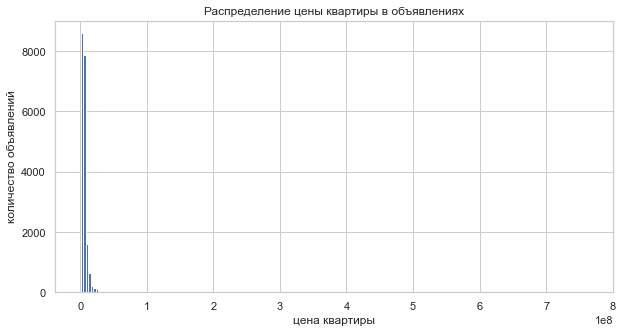

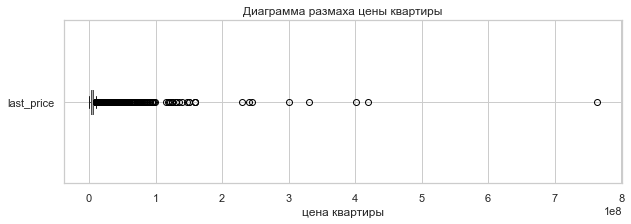

In [69]:
sns.set(style='whitegrid', palette='deep')
ax = df_step4['last_price'].hist(figsize=(10,5), bins=200)
ax.set_title('Распределение цены квартиры в объявлениях')
ax.set_xlabel('цена квартиры')
ax.set_ylabel('количество объявлений')
plt.show()

ax = df_step4.boxplot('last_price', figsize=(10,3), vert=False)
ax.set_title('Диаграмма размаха цены квартиры')
ax.set_xlabel('цена квартиры')
plt.show()

Видим по гистограмме, что распределение цены квартиры имеет длинных хвост из маленького количества значений.

По ящику с усами видим, что наш ящик оказался сжат выбросами, которые находятся за пределами верхнего межквартильного размаха.
Избавимся от выборосов по верхнему усу, принимая за аксиому что у нас должно быть нормальное распределение (или близкое к нормальному)

Напишем функцию `delete_outliers` для удаления выборосов выше верхнего уса

In [70]:
def delete_outliers(dataframe, column, x=10, y=3, title='Диаграмма размаха'):
    '''
    Аргументы функции:
    dataframe - датафрейм
    column - название колонки
    x, y - размеры графика
    title - название графика
    Промежуточные вычисления:
    q1 и q3 - первый и третий квартили
    iqr - межквартильный размах
    '''
    q1 = dataframe[column].quantile(0.25)                 
    q3 = dataframe[column].quantile(0.75)
    iqr = q3 - q1
    dataframe = dataframe[dataframe[column] <= (q3 + 1.5*iqr)]
    print('Удаляем выбросы больше:', (q3 + 1.5*iqr))
    plt.figure(figsize=(x, y))
    sns.boxplot(data=dataframe, x=column, orient='h')
    plt.title(title, fontsize=15)
    plt.show()
    return dataframe

Вызовем функцию `delete_outliers` для цены квартиры для удаления выбросов выше верхнего уса диаграммы размаха. Датафрейм без выбросов по цене квартиры назовем `df_delete_outliers`:

Удаляем выбросы больше: 11144375.0


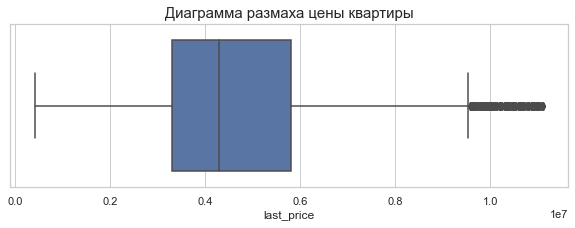

In [71]:
df_delete_outliers = delete_outliers(df_step4, 'last_price', title='Диаграмма размаха цены квартиры')

In [72]:
df_delete_outliers['last_price'].describe()

count       17,905.00
mean     4,718,939.72
std      2,064,494.06
min        430,000.00
25%      3,300,000.00
50%      4,300,000.00
75%      5,800,000.00
max     11,100,000.00
Name: last_price, dtype: float64

In [73]:
print('Выбросы составляют {:.2%} от всей выборки'.format(1 - df_delete_outliers.shape[0] / df_step4.shape[0]))

Выбросы составляют 7.83% от всей выборки


Видим, что максимальное значение в колонке после удаления выбросов ограничено значением 11,1 млн, а средняя цена продаваемой квартиры составляет 4,7 млн. Посмотрим на гистограмму после удаления выбросов

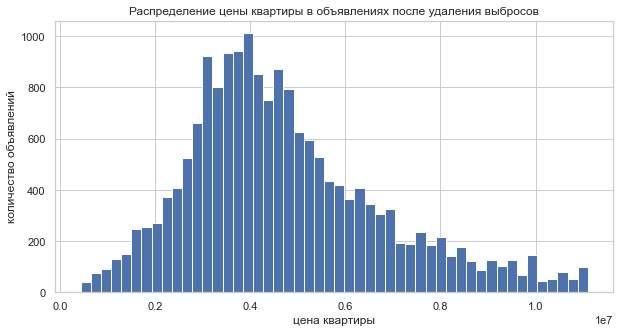

In [74]:
ax = df_delete_outliers['last_price'].hist(figsize=(10,5), bins=50)
ax.set_title('Распределение цены квартиры в объявлениях после удаления выбросов')
ax.set_xlabel('цена квартиры')
ax.set_ylabel('количество объявлений')
plt.show()

После удаления выбросов получили медиану стоимости квартиры в продаже в 4,3 млн. Распределение похоже на нормальное

**Построим гистограмму для площади квартиры и ящик с усами**

Строить будем по данным датафрейма `df_step4`, прошедшего шаги предобработки и добавления новых данных в таблицу.

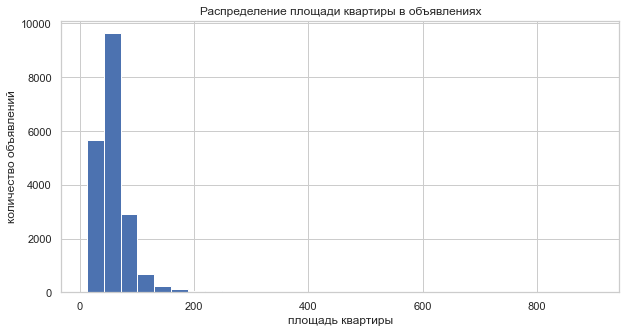

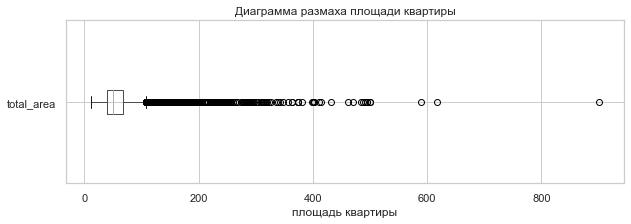

In [75]:
ax = df_step4['total_area'].hist(figsize=(10,5), bins=30)
ax.set_title('Распределение площади квартиры в объявлениях')
ax.set_xlabel('площадь квартиры')
ax.set_ylabel('количество объявлений')
plt.show()

ax = df_step4.boxplot('total_area', figsize=(10,3), vert=False)
ax.set_title('Диаграмма размаха площади квартиры')
ax.set_xlabel('площадь квартиры')
plt.show()

Видим по гистограмме, что распределение площади квартиры имеет длинных хвост из маленького количества значений.

По ящику с усами видим, что наш ящик оказался сжат выбросами, которые находятся за пределами верхнего межквартильного размаха.
Избавимся от выборосов по верхнему усу, принимая за аксиому что у нас должно быть нормальное распределение (или близкое к нормальному)

Вызовем функцию `delete_outliers` для удаления выбросов площади квартиры выше верхнего уса диаграммы размаха. Датафрейм без выбросов по площади квартиры назовем `df_delete_outliers`:

Удаляем выбросы больше: 108.0


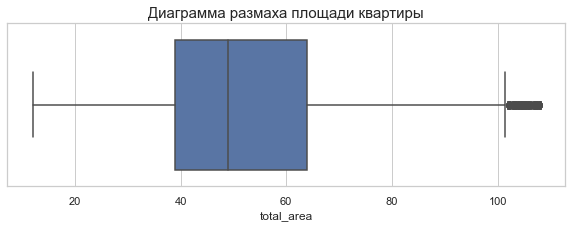

In [76]:
df_delete_outliers = delete_outliers(df_step4, 'total_area', title='Диаграмма размаха площади квартиры')

In [77]:
df_delete_outliers['total_area'].describe()

count   18,438.00
mean        53.15
std         18.09
min         12.00
25%         39.00
50%         49.00
75%         64.00
max        108.00
Name: total_area, dtype: float64

In [78]:
print('Выбросы составляют {:.2%} от всей выборки'.format(1 - df_delete_outliers.shape[0] / df_step4.shape[0]))

Выбросы составляют 5.09% от всей выборки


Видим, что максимальное значение в колонке после удаления выбросов ограничено значением 108 м2 (было 900). Среднее значение площади квартиры составляет 53,15 м2. Посмотрим на гистограмму после удаления выбросов

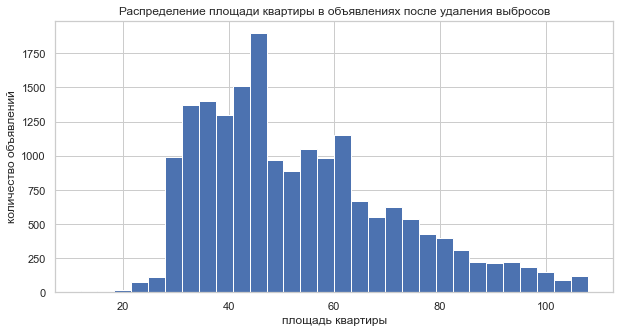

In [79]:
ax = df_delete_outliers['total_area'].hist(figsize=(10,5), bins=30)
ax.set_title('Распределение площади квартиры в объявлениях после удаления выбросов')
ax.set_xlabel('площадь квартиры')
ax.set_ylabel('количество объявлений')
plt.show()

После избавления от выбросов получили медиану в 49 м2. Распределение похоже на нормальное

**Построим гистограмму для числа комнат в квартирах**

Строить будем по данным датафрейма `df_step4`, прошедшего шаги предобработки и добавления новых данных в таблицу.

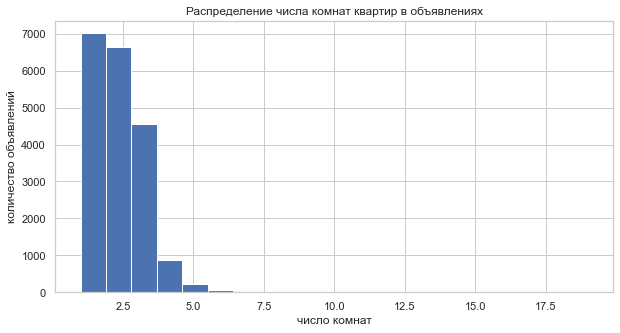

In [80]:
ax = df_step4['rooms'].hist(figsize=(10,5), bins=20)
ax.set_title('Распределение числа комнат квартир в объявлениях')
ax.set_xlabel('число комнат')
ax.set_ylabel('количество объявлений')
plt.show()

In [81]:
df_step4['rooms'].describe()

count   19,426.00
mean         2.03
std          1.03
min          1.00
25%          1.00
50%          2.00
75%          3.00
max         19.00
Name: rooms, dtype: float64

Распределение с длинным хвостом. Среднее количество комнат в квартире - 2

**Построим гистограмму для высоты потолков в квартирах**

Строить будем по данным датафрейма `df_step4`, прошедшего шаги предобработки и добавления новых данных в таблицу.

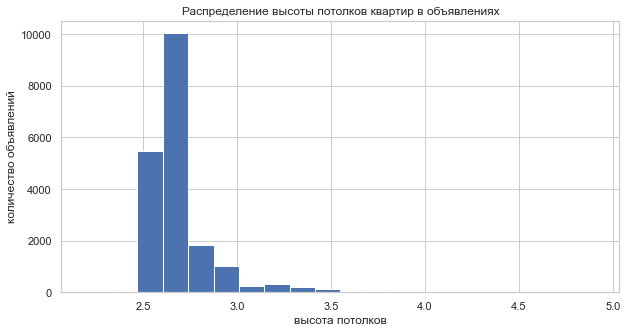

In [82]:
ax = df_step4['ceiling_height'].hist(figsize=(10,5), bins=20)
ax.set_title('Распределение высоты потолков квартир в объявлениях')
ax.set_xlabel('высота потолков')
ax.set_ylabel('количество объявлений')
plt.show()

In [83]:
df_step4['ceiling_height'].describe()

count   19,426.00
mean         2.69
std          0.20
min          2.20
25%          2.60
50%          2.65
75%          2.70
max          4.90
Name: ceiling_height, dtype: float64

Диапазон значений высоты потолков небольшой: от 2,2 до 4,9 метра. Среднее значение 2,69. Распределение значений с небольшим хвостом

### Изучим время продажи квартиры

**Построим гистограмму для времени продажи квартиры и ящик с усами**

Строить будем по данным датафрейма `df_step4`, прошедшего шаги предобработки и добавления новых данных в таблицу.

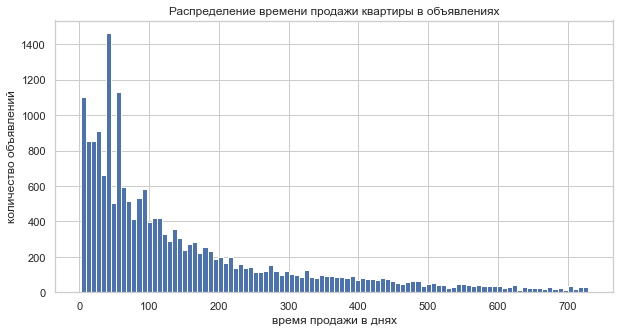

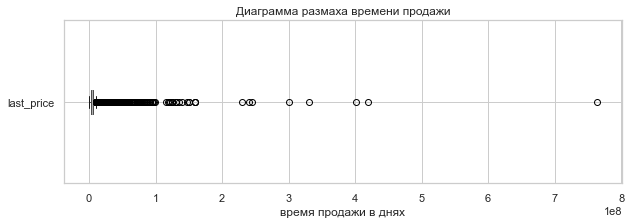

In [84]:
ax = df_step4['days_exposition'].hist(figsize=(10,5), bins=100)
ax.set_title('Распределение времени продажи квартиры в объявлениях')
ax.set_xlabel('время продажи в днях')
ax.set_ylabel('количество объявлений')
plt.show()

ax = df_step4.boxplot('last_price', figsize=(10,3), vert=False)
ax.set_title('Диаграмма размаха времени продажи')
ax.set_xlabel('время продажи в днях')
plt.show()

In [85]:
df_step4['days_exposition'].describe()

count   19,426.00
mean       151.34
std        156.44
min          2.00
25%         44.00
50%         90.00
75%        208.00
max        729.00
Name: days_exposition, dtype: float64

Среднее время продажи квартиры 151 день. Медианное значение 90 дней. 25% объявлений размещены меньше 44 дней - считаю такие продажи быстрыми. 25% объявлений размещены более 208 дней - считаю такие продажи необычно долгими

Видим по гистограмме, что распределение времени продажи имеет длинных хвост из маленького количества значений. На этапе предобработки данных мы избавились от значений времени продажи дольше 730 дней

По ящику с усами видим, что наш ящик оказался сжат выбросами, которые находятся за пределами верхнего межквартильного размаха.
Избавимся от выборосов по верхнему усу, принимая за аксиому что у нас должно быть нормальное распределение (или близкое к нормальному)

Вызовем функцию `delete_outliers` для удаления выбросов времени продажи выше верхнего уса диаграммы размаха. Датафрейм без выбросов назовем `df_delete_outliers`:

Удаляем выбросы больше: 454.0


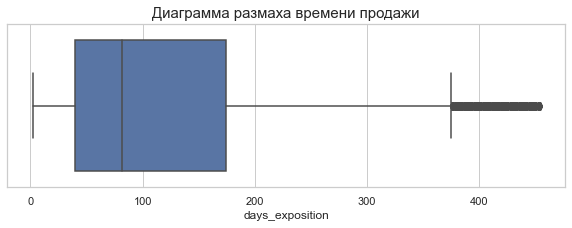

In [86]:
df_delete_outliers = delete_outliers(df_step4, 'days_exposition', title='Диаграмма размаха времени продажи')

In [87]:
df_delete_outliers['days_exposition'].describe()

count   18,115.00
mean       121.09
std        110.63
min          2.00
25%         40.00
50%         82.00
75%        174.00
max        454.00
Name: days_exposition, dtype: float64

Видим, что максимальное значение в колонке после удаления выбросов ограничено значением 454 днями. Среднее время продажи квартиры стало 121 день. Медианное значение 82 дня. Посмотрим на гистограмму после удаления выбросов

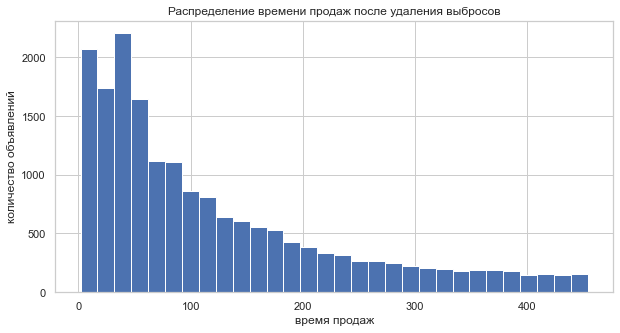

In [88]:
ax = df_delete_outliers['days_exposition'].hist(figsize=(10,5), bins=30)
ax.set_title('Распределение времени продаж после удаления выбросов')
ax.set_xlabel('время продаж')
ax.set_ylabel('количество объявлений')
plt.show()

После избавления от выбросов распределение похоже на нормальное

### Уберем редкие и выбивающиеся значения

Согласно исследованию в пунктах 4.2 и 4.3 избавимся от выбросов в колонках. Оставим следующие значения:
- цена квартиры до 11,1 млн
- площадь квартиры до 108 м2
- время продажи до 454 дней

Сохраним данные в датафрейм `good_data`

In [89]:
good_data = df_step4.query('last_price <= 11_100_000 and total_area <= 108 and days_exposition <= 454')

In [90]:
print('Выбросы составляют {:.2%} от всей выборки'.format(1 - good_data.shape[0] / df_step4.shape[0]))

Выбросы составляют 14.42% от всей выборки


In [91]:
good_data[['last_price', 'total_area', 'rooms', 'ceiling_height', 'days_exposition']].describe()

,last_price,total_area,rooms,ceiling_height,days_exposition
count,"16,624.00","16,624.00","16,624.00","16,624.00","16,624.00"
mean,"4,659,416.47",51.52,1.88,2.66,117.86
std,"2,010,821.76",16.63,0.85,0.16,109.02
min,"430,000.00",12.00,1.00,2.20,2.00
25%,"3,300,000.00",38.50,1.00,2.60,39.00
50%,"4,300,000.00",47.70,2.00,2.65,77.00
75%,"5,727,356.25",62.00,2.00,2.65,169.00
max,"11,100,000.00",108.00,6.00,4.70,454.00


После удаления строк с выбросами уменьшилось максимальное количество комнат в продаваемых квартирах: 6 комнат. А максимальная высота потолков уменьшилась до 4,7 метров

### Изучим от чего зависит цена квартиры

Изучим зависит ли цена от площади, числа комнат, удалённости от центра.

Для этого необходимо построить диаграммы рассеяния с учетом количества комнат в квартире

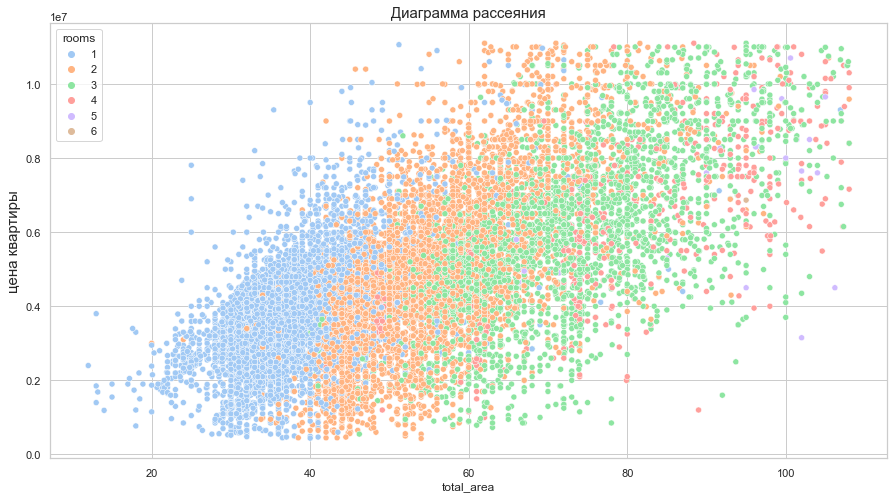

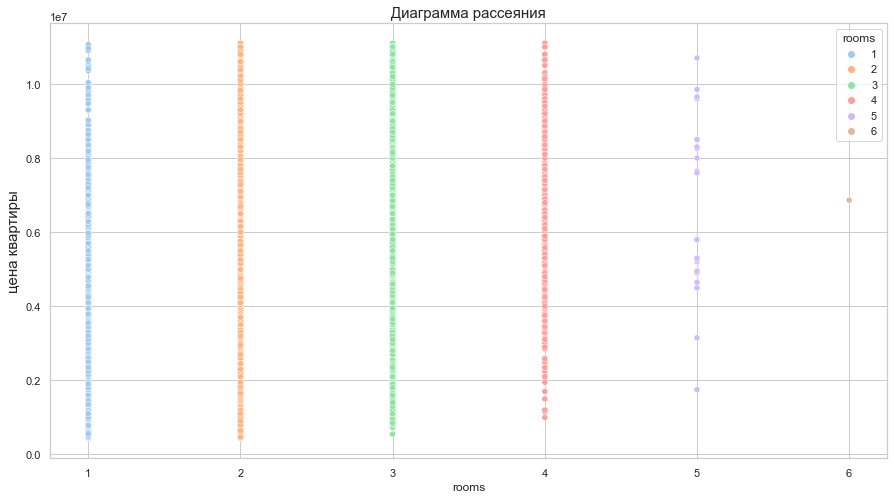

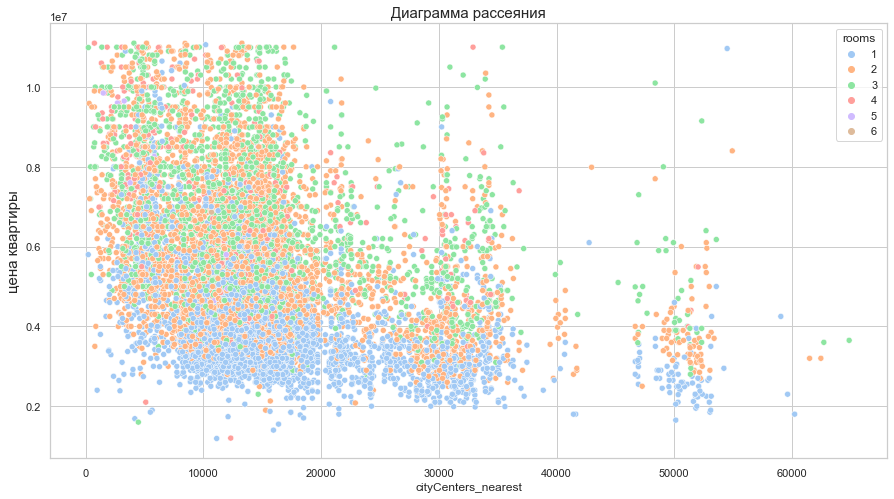

In [92]:
sns.set(style='whitegrid', palette='pastel')
colors = sns.color_palette('pastel')[:good_data.rooms.nunique()]

columns = ['total_area', 'rooms', 'cityCenters_nearest']
for column in columns:
    plt.figure(figsize=(15,8))
    ax = sns.scatterplot(data=good_data, 
                         x=column, 
                         y='last_price', 
                         hue='rooms', 
                         palette=colors, 
                         alpha=1) 
    ax.set_title('Диаграмма рассеяния', fontsize=15)
    ax.set_ylabel('цена квартиры', fontsize=15)
    plt.show()

С учетом количества комнат в квартире взаимосвязь цена квартиры-расстояние до центра визуально прослеживается лучше

Построим матрицу корреляции:

In [93]:
corr = good_data[['last_price',
           'total_area',
           'rooms',
           'cityCenters_nearest']].corr()

corr.style.background_gradient().format('{:.2}')

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.0,0.68,0.42,-0.34
total_area,0.68,1.0,0.8,-0.11
rooms,0.42,0.8,1.0,-0.071
cityCenters_nearest,-0.34,-0.11,-0.071,1.0


**Выводы**
- цена - площадь квартиры: взаимосвязь сильная - с ростом площади растет цена квартиры
- цена - количество комнат: взаимосвязь слабая положительная  - с ростом количества комнат растет цена квартиры
- цена - расстояние до центра: взаимосвязь слабая отрицательная - с увеличением расстояния от центра падает цена квартиры
- больше всего на цену квартиры влияет площадь квартиры

Построим диаграммы размаха:

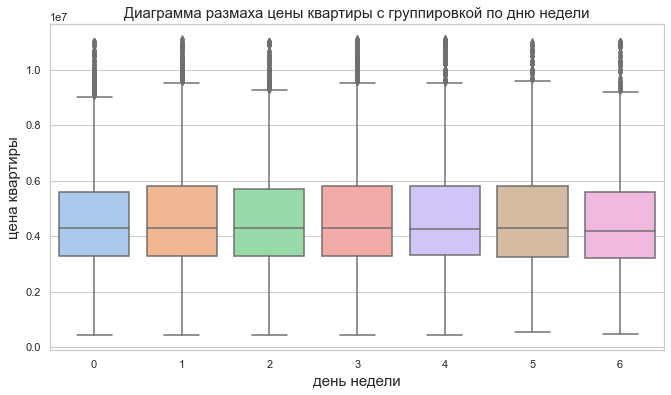

In [94]:
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(11,6))
sns.boxplot(data=good_data, x='weekday', y='last_price')
plt.title('Диаграмма размаха цены квартиры с группировкой по дню недели', fontsize=15)
plt.xlabel('день недели', fontsize=15)
plt.ylabel('цена квартиры', fontsize=15)
plt.show()

**Вывод**

День недели не влияет на цену квартиры

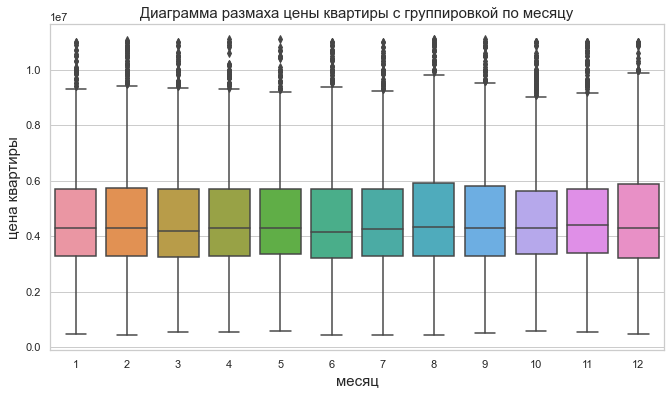

In [95]:
plt.figure(figsize=(11,6))
sns.boxplot(data=good_data, x='month', y='last_price')
plt.title('Диаграмма размаха цены квартиры с группировкой по месяцу', fontsize=15)
plt.xlabel('месяц', fontsize=15)
plt.ylabel('цена квартиры', fontsize=15)
plt.show()

**Вывод**

Месяц года не влияет на цену квартиры

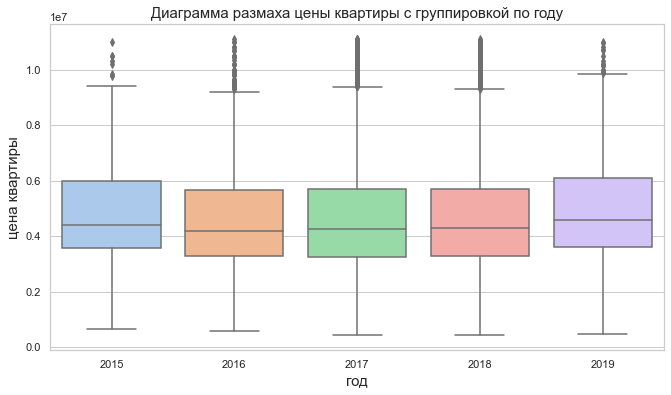

In [96]:
plt.figure(figsize=(11,6))
sns.boxplot(data=good_data, x='year', y='last_price')
plt.title('Диаграмма размаха цены квартиры с группировкой по году', fontsize=15)
plt.xlabel('год', fontsize=15)
plt.ylabel('цена квартиры', fontsize=15)
plt.show()

**Вывод**

Видна взаимосвязь: с 2015 по 2019 год медианное значение цены квартиры растет. Скорее всего это связано с инфляцией

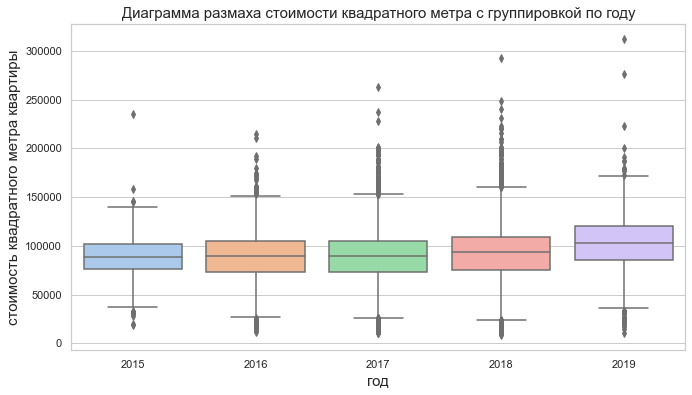

In [97]:
plt.figure(figsize=(11,6))
sns.boxplot(data=good_data, x='year', y='price_per_meter')
plt.title('Диаграмма размаха стоимости квадратного метра с группировкой по году', fontsize=15)
plt.xlabel('год', fontsize=15)
plt.ylabel('стоимость квадратного метра квартиры', fontsize=15)
plt.show()

**Вывод**

Так же видна взаимосвязь со стоимостью квадратного метра: с 2015 по 2019 год стоимостью квадратного метра растет. Скорее всего это связано с инфляцией

Построим диаграмму размаха цены квартиры с группировкой по категории этажности

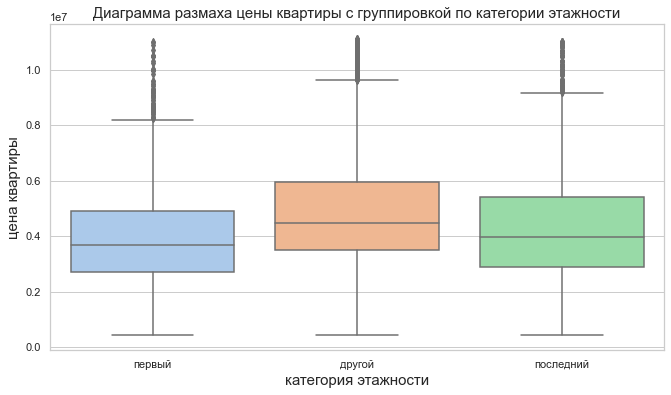

In [98]:
plt.figure(figsize=(11,6))
sns.boxplot(data=good_data, x='floor_type', y='last_price')
plt.title('Диаграмма размаха цены квартиры с группировкой по категории этажности', fontsize=15)
plt.xlabel('категория этажности', fontsize=15)
plt.ylabel('цена квартиры', fontsize=15)
plt.show()

**Выводы**
- Самые дешевые квартиры на первом этаже
- Самые дорогие квартиры находятся не на крайних этажах

### Изучим 10 населённых пунктов с наибольшим числом объявлений

Сделаем сводную таблицу с группировкой по населенному пункту. Выведем на экран первые 10 с наибольшим количеством объявлений и сохраним данные в `group_top_10`

In [99]:
group_top_10 = (
    good_data.groupby('locality_name')
    .agg(Количество_объявлений=('locality_name', 'count'),
         Средняя_цена_м2=('price_per_meter', 'mean'))
    .sort_values(by='Количество_объявлений',ascending=False)
    .head(10)
)

In [100]:
group_top_10

,Количество_объявлений,Средняя_цена_м2
locality_name,,
санкт-петербург,10627,"104,112.19"
поселок мурино,480,"85,304.39"
поселок шушары,370,"77,519.74"
всеволожск,295,"66,876.71"
колпино,284,"74,606.05"
поселок парголово,275,"89,443.33"
пушкин,254,"99,201.22"
деревня кудрово,245,"92,289.46"
гатчина,238,"68,326.61"


Отсортируем `group_top_10` по убыванию средней цены м2 и перезапишем его

In [101]:
print('Населенный пункт с самой высокой стоимостью жилья из ТОП10:', group_top_10['Средняя_цена_м2'].idxmax())

Населенный пункт с самой высокой стоимостью жилья из ТОП10: санкт-петербург


In [102]:
print('Населенный пункт с самой низкой стоимостью жилья из ТОП10:', group_top_10['Средняя_цена_м2'].idxmin())

Населенный пункт с самой низкой стоимостью жилья из ТОП10: выборг


**Вывод**
- Населенный пункт с самой высокой стоимостью жилья: санкт-петербург
- Населенный пункт с самой низкой стоимостью жилья: выборг

### Изучим квартиры в Санкт-Петербурге

Выделим квартиры в Санкт-Петербурге в таблицу `df_spb`:

In [103]:
df_spb = good_data.copy().query('locality_name == "санкт-петербург"')

Удалим пропущенные значения

In [104]:
df_spb['cityCenters_nearest'].isna().sum()

16

In [105]:
df_spb.dropna(inplace=True)

Создадим столбец `center_km` с расстоянием до центра в километрах: округлим до целых значений преобразованием в тип `int`

In [106]:
df_spb['center_km'] = (df_spb['cityCenters_nearest']/1000).astype('int64')

Посчитаем среднюю цену квартиры для каждого километра и среднюю цену квадратного метра для каждого километра

In [107]:
df_spb_group = df_spb.groupby('center_km').agg(Средняя_цена_квартиры=('last_price', 'mean'))
df_spb_group.head(5)

,Средняя_цена_квартиры
center_km,
0,"7,812,870.97"
1,"7,523,081.07"
2,"7,278,177.42"
3,"6,853,457.17"
4,"7,188,651.86"


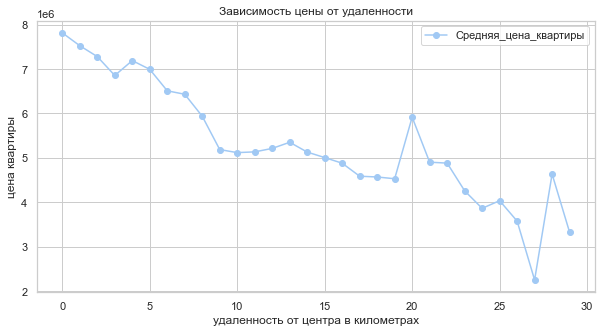

In [108]:
ax = df_spb_group.reset_index().plot(x='center_km', y='Средняя_цена_квартиры', grid=True, figsize=(10,5),style='o-')
ax.set_title('Зависимость цены от удаленности')
ax.set_xlabel('удаленность от центра в километрах')
ax.set_ylabel('цена квартиры')
plt.show()

In [109]:
df_spb_group_2 = df_spb.groupby('center_km').agg(Средняя_цена_кв_метра=('price_per_meter', 'mean'))
df_spb_group_2.head(5)

,Средняя_цена_кв_метра
center_km,
0,"119,378.39"
1,"116,454.34"
2,"115,658.14"
3,"110,118.22"
4,"119,749.57"


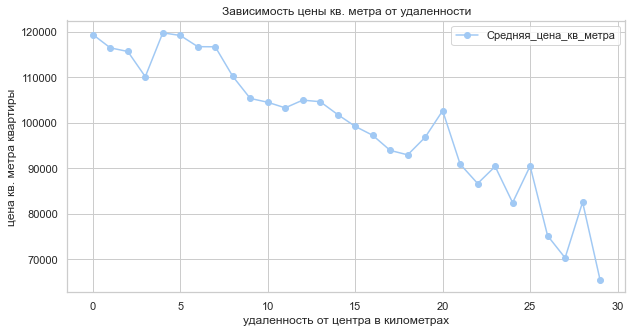

In [110]:
ax = df_spb_group_2.reset_index().plot(x='center_km', y='Средняя_цена_кв_метра', grid=True, figsize=(10,5),style='o-')
ax.set_title('Зависимость цены кв. метра от удаленности')
ax.set_xlabel('удаленность от центра в километрах')
ax.set_ylabel('цена кв. метра квартиры')
plt.show()

**Вывод**

Определим центр города Санкт-Петербург - расстоянее не более 5 км. На графике видно что после 5 км уменьшение цены квартиры перестает носить резкий характер

### Изучим квартиры в центре Санкт-Петербурга

Выделим квартиры в центре Санкт-Петербурге в таблицу `df_spb_center`:

In [111]:
df_spb_center = df_spb.query('center_km <= 5')

Построим матрицу диаграмм рассеяния

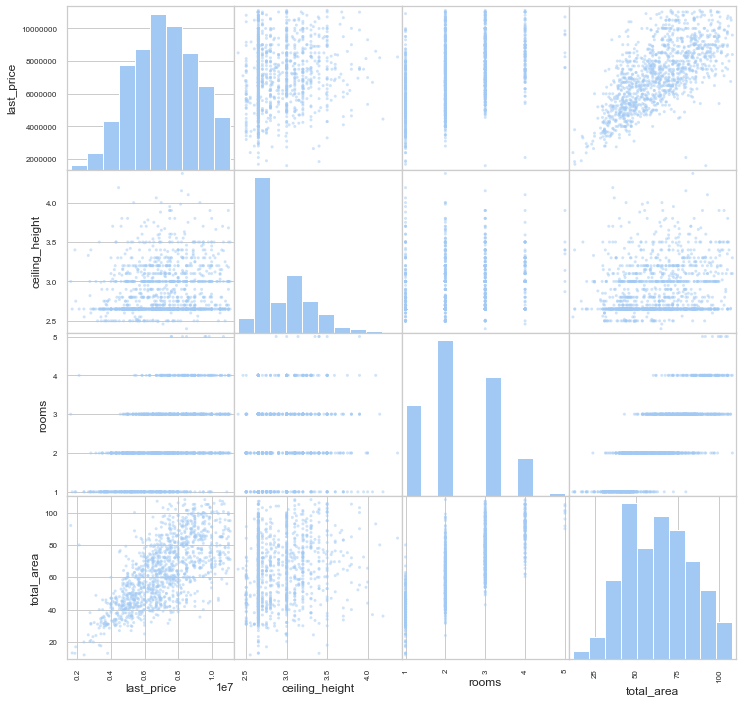

In [112]:
columns = ['last_price','ceiling_height','rooms','total_area']
pd.plotting.scatter_matrix(df_spb_center[columns], figsize=(12,12))
plt.show()

In [113]:
df_spb_center[['last_price', 'total_area', 'rooms', 'ceiling_height', 'days_exposition']].describe()

,last_price,total_area,rooms,ceiling_height,days_exposition
count,"1,194.00","1,194.00","1,194.00","1,194.00","1,194.00"
mean,"7,108,502.68",63.48,2.27,2.89,134.39
std,"1,929,081.85",19.95,0.94,0.32,116.78
min,"1,600,000.00",12.00,1.00,2.40,3.00
25%,"5,690,000.00",47.00,2.00,2.65,43.00
50%,"7,100,000.00",63.00,2.00,2.75,92.50
75%,"8,500,000.00",78.61,3.00,3.08,203.75
max,"11,100,000.00",108.00,5.00,4.37,453.00


**Выводы**
- Среднее значение цены квартиры в центре Санкт-Петербурга составляет 7,136 млн, что гораздо больше средней цены по всей базе (4,659 млн)
- Среднее значение общей площади квартиры в центре Санкт-Петербурга составляет 65,59 м2, что гораздо больше среднего значения по всей базе (51,52)
- Среднее значение количества комнат в центре Санкт-Петербурга составляет 2,38, это больше среднего значения по всей базе (1,88)
- Средняя высота потолков в центре Санкт-Петербурга составляет 2,95 м, это больше среднего значения по всей базе (2,66)
- Среднее время продажи квартиры в центре Санкт-Петербурга составляет 132 дня, это больше среднего значения по всей базе (117)

Построим матрицу корреляции для Центра Санкт-Петербурга:

In [114]:
corr = df_spb_center[['last_price',
           'total_area',
           'rooms',
           'cityCenters_nearest']].corr()

corr.style.background_gradient().format('{:.2}')

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.0,0.68,0.44,-0.078
total_area,0.68,1.0,0.79,-0.12
rooms,0.44,0.79,1.0,-0.12
cityCenters_nearest,-0.078,-0.12,-0.12,1.0


Напомним матрицу корреляции для всех данных:

In [115]:
corr = good_data[['last_price',
           'total_area',
           'rooms',
           'cityCenters_nearest']].corr()

corr.style.background_gradient().format('{:.2}')

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.0,0.68,0.42,-0.34
total_area,0.68,1.0,0.8,-0.11
rooms,0.42,0.8,1.0,-0.071
cityCenters_nearest,-0.34,-0.11,-0.071,1.0


**Выводы по корреляции для центра Санкт-Петербурга в сравнении со всеми данными по датасету**
- цена - площадь квартиры: взаимосвязь стала еще сильнее
- цена - количество комнат: взаимосвязь стала еще сильнее
- цена - расстояние до центра: взаимосвязь стала еще сильнее
- попрежнему больше всего на цену квартиры влияет площадь квартиры

Взаимосвязь исследованных параметров для квартир в центре Санкт-Петербурга является большей в сравнении со всеми данными по датасету, так как, что и логично, чем ближе к центру мегаполиса, тем престижнее жилье, дороже жилье, зеленее трава и улыбчивее дворники

Построим диаграммы размаха для Центра Санкт-Петербурга::

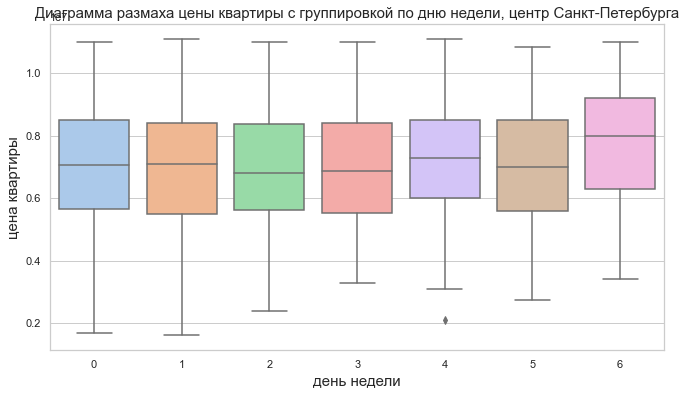

In [116]:
plt.figure(figsize=(11,6))
sns.boxplot(data=df_spb_center, x='weekday', y='last_price')
plt.title('Диаграмма размаха цены квартиры с группировкой по дню недели, центр Санкт-Петербурга', fontsize=15)
plt.xlabel('день недели', fontsize=15)
plt.ylabel('цена квартиры', fontsize=15)
plt.show()

**Вывод**

День недели не влияет на цену квартиры так же как и по всей базе

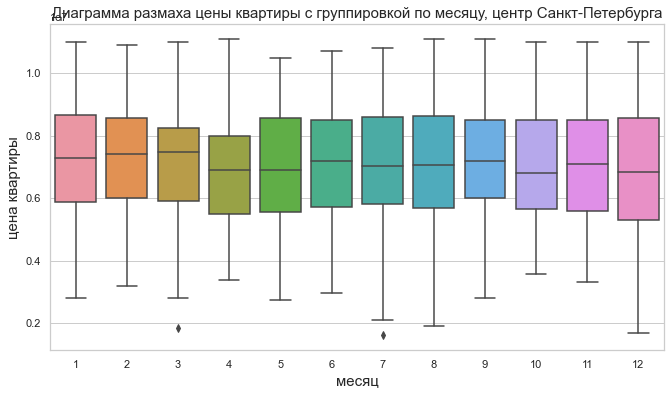

In [117]:
plt.figure(figsize=(11,6))
sns.boxplot(data=df_spb_center, x='month', y='last_price')
plt.title('Диаграмма размаха цены квартиры с группировкой по месяцу, центр Санкт-Петербурга', fontsize=15)
plt.xlabel('месяц', fontsize=15)
plt.ylabel('цена квартиры', fontsize=15)
plt.show()

**Вывод**

Месяц года не влияет на цену квартиры так же как и по всей базе

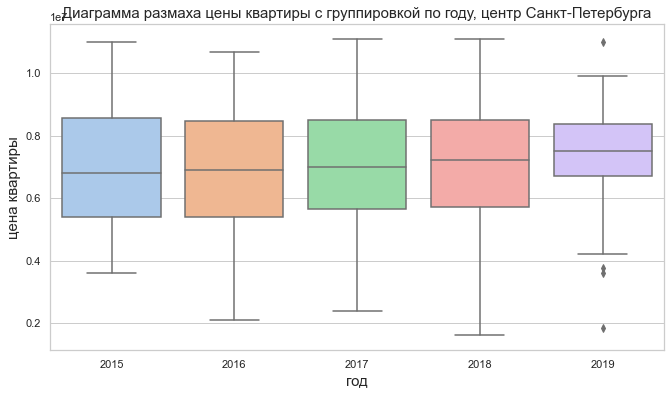

In [118]:
plt.figure(figsize=(11,6))
sns.boxplot(data=df_spb_center, x='year', y='last_price')
plt.title('Диаграмма размаха цены квартиры с группировкой по году, центр Санкт-Петербурга', fontsize=15)
plt.xlabel('год', fontsize=15)
plt.ylabel('цена квартиры', fontsize=15)
plt.show()

**Вывод**

Видна взаимосвязь: с 2015 по 2019 год медианное значение цены квартиры растет. Скорее всего это связано с инфляцией  же как и во всем датасете

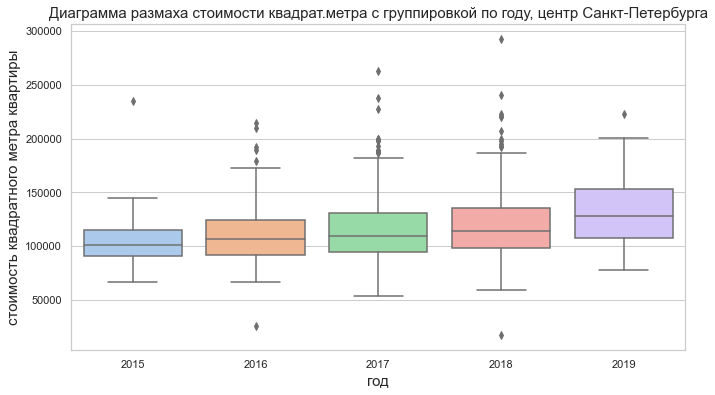

In [119]:
plt.figure(figsize=(11,6))
sns.boxplot(data=df_spb_center, x='year', y='price_per_meter')
plt.title('Диаграмма размаха стоимости квадрат.метра с группировкой по году, центр Санкт-Петербурга', fontsize=15)
plt.xlabel('год', fontsize=15)
plt.ylabel('стоимость квадратного метра квартиры', fontsize=15)
plt.show()

**Вывод**

Так же видна взаимосвязь со стоимостью квадратного метра: с 2015 по 2019 год стоимостью квадратного метра растет. Скорее всего это связано с инфляцией

Построим диаграмму размаха цены квартиры с группировкой по категории этажности

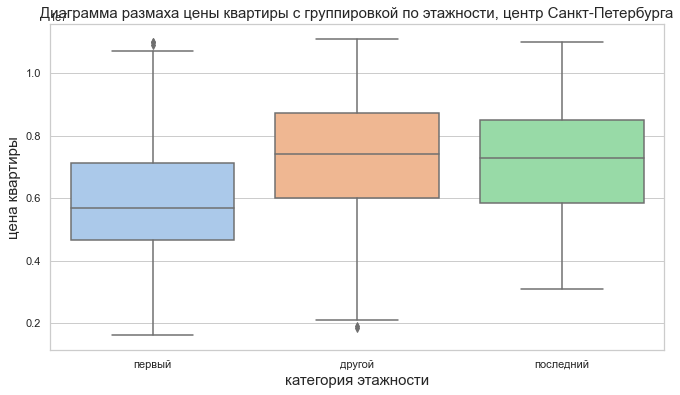

In [120]:
plt.figure(figsize=(11,6))
sns.boxplot(data=df_spb_center, x='floor_type', y='last_price')
plt.title('Диаграмма размаха цены квартиры с группировкой по этажности, центр Санкт-Петербурга', fontsize=15)
plt.xlabel('категория этажности', fontsize=15)
plt.ylabel('цена квартиры', fontsize=15)
plt.show()

**Выводы**
- Самые дешевые квартиры в центре Санкт-Петербурга на первом этаже так же как и во всем датасете
- Самые дорогие квартиры в центра Санкт-Петербурга находятся на последнем этаже в отличие, от данных по датасету. Это связано с тем, что на последних этажах открываются удивительные виды на город-герой и доступ к крышам. А спрос рождает предложение
- На всех диаграммах размаха по центру Санкт-Петербурга отсутствуют выбросы выше верхнего уса, в отличие от аналогичных диаграмм по всему датасету. Так как именно значения по Санкт-Петербургу и давали эти выбросы на графиках по всему датасету

## Общий вывод

В колонках исходного датафрейма обнаружили много пропущенных данных, в том числе в колонках, данные для которых собирались автоматически (например, cityCenters_nearest — расстояние до центра города). Есть вопросы к ответстенным за сбор данных, необходимо решать эту проблему, так как пропущенные данные влияют на качество исследования

По техническому заданию добавили необходимые столбцы такие как цена за квадратный метр, соотношение жилой площади к общей площади, соотношение кухни на общую площадь. Так же добавили колонки с днем, месяцем и годом публикации. Выполнили категоризацию этажности квартиры.

На этапе исследовательского анализа данных были обнаружены выбросы в колонках с ценой жилья, площадью жилья - они связаны с наличием очень больших, соответственно очень дорогих квартир в центре Санкт-Петербурга по отношению к дешевым квартирам за пределами Санкт-Петербурга, а так же в колонке с длительностью размещения объявления, что может быть связано с забывчивостью размещающих объявление о необходимости его закрытия. Мы избавились от выборосов по верхнему усу ящика с усами, принимая за аксиому что у нас должно быть нормальное распределение значений (или близкое к нормальному)

Нашли топ 10 населенных пунктов с наибольшим количеством объявлений о продаже. Вывел населенные пункты с самой высокой и низкой стоимостью жилья.

Определили центр Санкт-Петербурга является территория радиусом не более 3 км от нулевого километра. Определили, что средняя цена квартиры, средняя площадь квартиры, средняя высота потолков, среднее количество комнат и даже время продажи квартиры в центре Санкт-Петербурка больше соответствующих средних параметров квартир во всей базе (эффект мегаполиса)

Главными факторами влияющими на стоимость квартиры являются - общая площадь и число комнат (эти факторы напрямую зависят друг от друга), в центре Санкт-Петербурга же эти факторы еще сильнее влияют на цену квартиры, это фактор мегаполиса. Квартиры на первом или последнем этаже обычно продаются по более низкой цене, чем квартиры на других этажах. Для квартир же в центре Санкт-Петербурга стоимость на последних этажах выше, чем на остальных из-за открывающихся шикарных видов на город из окон на последних этажах, а так же выхода на крышу. День недели и месяц публикации объявления не являются факторами, влияющими на стоимость, по которой объект недвижимости будет продан. Исследование лишь показало, что в среднем квартиры с каждым годом становятся дороже из-за инфляции. На всех диаграммах размаха по центру Санкт-Петербурга отсутствуют выбросы выше верхнего уса, в отличие от аналогичных диаграмм по всему датасету. Так как именно значения по Санкт-Петербургу и давали эти выбросы на графиках по всему датасету